## User-User Friendship Network

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
import os

In [3]:
user_friends = pd.read_csv('../data/hetrec2011-lastfm-2k/user_friends.dat', sep= '\t')
print(user_friends.shape)
user_friends.head(5)

(25434, 2)


,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831


In [4]:
G = nx.Graph()
edge_list = list(zip(user_friends['userID'], user_friends['friendID']))
G.add_edges_from(edge_list)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1892
Number of edges: 12717
Average degree:  13.4429


In [5]:
!conda install faker -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/arunavsaikia/opt/anaconda3/envs/env

  added / updated specs:
    - faker


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    faker-3.0.0                |           py37_0         1.4 MB
    text-unidecode-1.2         |           py37_0          63 KB
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  faker              pkgs/main/osx-64::faker-3.0.0-py37_0
  text-unidecode     pkgs/main/osx-64::text-unidecode-1.2-py37_0



faker-3.0.0          | 1.4 MB    | ##################################### | 100% 
text-u

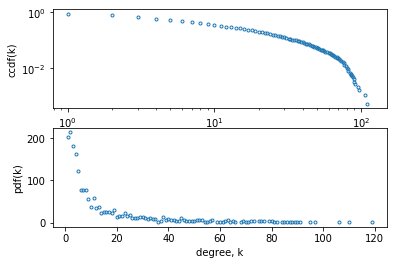

In [8]:
degrees = [G.degree(node) for node in G.nodes()]
from collections import Counter

nk = Counter(degrees)
x = []
y = []
for k in sorted(nk):
    x.append(k)
    y.append(nk[k])
    
cdf = np.cumsum(y)
ccdf = (sum(y)-cdf)/max(cdf)
fig = plt.figure()

plt.subplot(2,1,1)
plt.xlabel('degree, k')
plt.ylabel("ccdf(k)")
plt.loglog(x,ccdf, 'o', markersize=3, markerfacecolor='none')

plt.subplot(2,1,2)
plt.xlabel('degree, k')
plt.ylabel("pdf(k)")
plt.plot(x,y, 'o', markersize=3, markerfacecolor='none')

# fig.tight_layout(pad=3.0)
plt.show()


In [9]:
from faker import Faker
fake = Faker()
for node in G.nodes():
    G.nodes[node]['name'] = fake.name()

In [10]:
file_path = '../data/networkx graphs/friends.gexf'
os.makedirs(os.path.dirname(file_path), exist_ok=True)

nx.write_gexf(G, file_path)

Visualization using Gephi

![alt text](../data/images/friendship.png "Title")